<a href="https://colab.research.google.com/github/Giovannacm/machine-learning/blob/main/LinearRegression_GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
def cost(y_true, y_predicted):
  cost = np.sum(np.square(y_predicted - y_true)) / (2 * len(y_true))
  return cost

In [3]:
def gradient_descent(X, y, max_iterations=3000, learning_rate=1e-4, stopping_threshold=1e-6):
  m, n = X.shape

  X = np.c_[np.ones((m, 1)), X]
  w = np.random.randn(n + 1, 1)
  
  previous_cost = None

  for iteration in range(max_iterations):
    y_predicted = X.dot(w)
    
    current_cost = cost(y, y_predicted)
    if stopping_threshold and previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
      print('stopping_threshold reached in iteration', iteration)
      break
    previous_cost = current_cost

    w = w - learning_rate * X.T.dot(y_predicted - y) / m

  return w

In [56]:
X = np.array([[32], [53], [61], [47], [59], [55], [52], [39], [48], [52], [45], [54], [44], [58], [56], [48], [44], [60], [45], [38]])
y = np.array([[31], [68], [62], [71], [87], [78], [79], [59], [75], [71], [55], [82], [62], [75], [81], [60], [82], [97], [48], [56]])

In [29]:
X = 3*np.random.rand(20, 1)
y = 9 + 2*X + np.random.rand(20, 1)

stopping_threshold reached in iteration 2604
[[9.42015814]
 [2.07472354]]


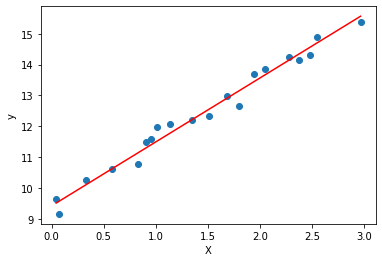

In [30]:
estimated_weights = gradient_descent(X, y, max_iterations=5000, learning_rate=1e-2)
print(estimated_weights)

y_pred = estimated_weights[0, 0] + X.dot(estimated_weights[1:, 0])

plt.scatter(X, y)
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='r')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Teste com biblioteca

score 0.9785510843392533
weights [[2.04981396]] bias: [9.46475128]


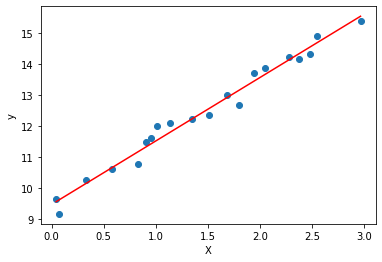

In [31]:
reg = LinearRegression().fit(X, y)
print('score', reg.score(X, y))
print('weights', reg.coef_, 'bias:', reg.intercept_ )

y_pred = reg.predict(X)

plt.scatter(X, y)
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='r')
plt.xlabel('X')
plt.ylabel('y')
plt.show()